In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import itertools

# 1- Use suitable data preprocessing methods, including binning for age variable 
# and converting tabular format to transactional (using one-hot encoding), 
# on the dataset to prepare data for association rule mining.

# 2- Extract rules using all combinations of the following hyper-parameters:

# min_sup = [0.05, 0.1, 0.4]
# min_conf= [0.70, 0.85, 0.95]
# min_lift= [1.1, 1.5, 4]
 

# 3- For one combination of hyper-parameters which produces 20 to 50 rules, 
# save the resulting rules and report hyper-parameters that produced it
# 4- Visualize Support, Lift and Confidence of rules in step 3
train_data = pd.read_csv('amr_horse_ds.csv')
train_data.head(5)


,Age,Sex,Decade,Gram_ID,Amikacin,Ampicillin,Cefazolin,Chloramphenicol,Enrofloxacin,Erythromycin,Gentamicin,Imipenem,Oxacillin,Penicillin,Rifampin,Tetracycline,Ticarcillin,Ticarcillin-clavulanic,Trimethoprim-Sulfamethoxazole
0,1.0,M,2010-2020,Negative,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True
1,1.0,M,2010-2020,Negative,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0.1,M,2000-2009,Negative,False,False,True,True,False,False,False,False,False,True,False,False,False,False,True
3,3.0,M,2000-2009,Negative,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,16.0,F,2010-2020,Negative,False,False,True,True,False,True,False,False,True,True,True,True,False,False,True


In [51]:
#preprocess
# 1- Use suitable data preprocessing methods, including binning for age variable 
# and converting tabular format to transactional (using one-hot encoding), 
# on the dataset to prepare data for association rule mining.

#自动分箱，分成三个区间:Auto binning, three ages
train_data['Age_bin'] = pd.qcut(train_data['Age'], q = 3, labels=['Young', 'MiddleAge', 'Old'])
#delete origin age data avoid same data mistakes
train_data = train_data.drop(columns=['Age'])
#one-hot code
# get the col except (Sex, Decade, Gram_ID, Age_bin）
exclude_cols = ['Sex', 'Decade', 'Gram_ID', 'Age_bin']
antibiotic_cols = [col for col in train_data.columns if col not in exclude_cols]
# change to boolen type
for col in antibiotic_cols:
    train_data[col] = train_data[col].astype(bool)
# all change to one-hot code
train_data_encoded = pd.get_dummies(train_data)
print(train_data_encoded.head())

   Amikacin  Ampicillin  Cefazolin  Chloramphenicol  Enrofloxacin  \
0      True        True       True             True          True   
1     False       False      False            False         False   
2     False       False       True             True         False   
3     False       False      False            False         False   
4     False       False       True             True         False   

   Erythromycin  Gentamicin  Imipenem  Oxacillin  Penicillin  ...  Sex_M  \
0          True        True     False       True        True  ...   True   
1         False       False     False      False        True  ...   True   
2         False       False     False      False        True  ...   True   
3         False       False     False      False        True  ...   True   
4          True       False     False       True        True  ...  False   

   Sex_M   Sex_MC  Decade_2000-2009  Decade_2010-2020  Gram_ID_Negative  \
0   False   False             False              True

In [52]:
# 2- Extract rules using all combinations of the following hyper-parameters:

# min_sup = [0.05, 0.1, 0.4]
# min_conf= [0.70, 0.85, 0.95]
# min_lift= [1.1, 1.5, 4]
min_sups = [0.05, 0.1, 0.4]
min_confs = [0.70, 0.85, 0.95]
min_lifts = [1.1, 1.5, 4]
#store for rules
best_rules = None

# Iterate through all parameter combinations
for sup, conf, lift in itertools.product(min_sups, min_confs, min_lifts):
    frequent_items = apriori(train_data_encoded, min_support=sup, use_colnames=True)
    rules = association_rules(frequent_items, metric="confidence", min_threshold=conf)
    rules = rules[rules['lift'] >= lift]

    # Find the combination that generates between 20–50 rules
    # 3- For one combination of hyper-parameters which produces 20 to 50 rules, 
    # save the resulting rules and report hyper-parameters that produced it
    if 20 <= len(rules) <= 50:
        best_rules = rules
        print(f"✅ Found good rules: support={sup}, confidence={conf}, lift={lift}, rules={len(rules)}")
        break
    # Find the combination that generates between 20–50 rules
    # 3- For one combination of hyper-parameters which produces 20 to 50 rules, 
    # save the resulting rules and report hyper-parameters that produced it


✅ Found good rules: support=0.1, confidence=0.95, lift=4, rules=24


In [53]:
if best_rules is not None:
    best_rules.to_csv("antibiotic_rules.csv", index=False)
    print("We saved rules to antibiotic_rules.csv")
else:
    print("We didn't find any suitable parameter combination.")

We saved rules to antibiotic_rules.csv


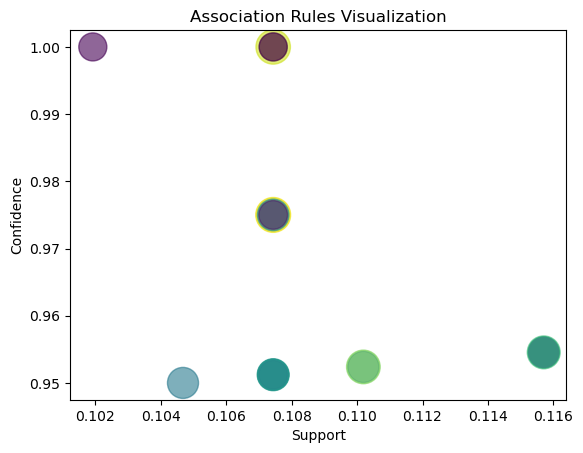

In [ ]:
# I use size and color of bubble to show lift
if best_rules is not None:
    plt.scatter(best_rules['support'], best_rules['confidence'],
                s=best_rules['lift'] * 100, alpha=0.6, c=best_rules['lift'], cmap='viridis')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Association Rules Visualization')
    plt.show()